In [6]:
#aerofit_treadmill_data 

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mp
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats

df = pd.read_csv('/Users/adamraszyk/Downloads/datasets 2/aerofit_treadmill_data.csv')


In [8]:

print(df)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2       66  
3       85  
4       47

In [9]:
df.shape

(180, 9)

In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
## here we can convert all Objects into a catagory this works here as there is a small amount of unique values 


In [46]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [47]:
# now to confirm 

In [48]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [49]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [50]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [51]:
# OBSERVATIONS 
#The dataset is complete with no missing entries.
#There are three distinct products present.
#The product KP281 appears most frequently.
#The ages in the dataset range from 18 to 50, with an average age of 28.79. Furthermore, 75% of the individuals are 33 years old or younger.
#A significant portion of the dataset, 75%, has received 16 years of education, indicating that the majority have a high level of educational attainment.
#Among the 180 observations, 104 are male, and the remaining are female.
#The standard deviations for Income and Miles are notably high, suggesting the possibility of outliers within these variables.

In [52]:

# Total number of unique Product ids
df['Product'].nunique()

3

In [53]:
# unique list of products ids 
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [54]:
#list of ages 
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [55]:
#total # of unique ages 
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [56]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [57]:

# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

In [58]:
#rating scale 1 to 5 
df['Fitness'].value_counts().sort_index()



Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

In [59]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [60]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

In [61]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [62]:

#Around 39% of customers use 3 days per week
#Less than 2% of customers use 7 days per week

In [63]:
#visuals 


<function matplotlib.pyplot.show(close=None, block=None)>

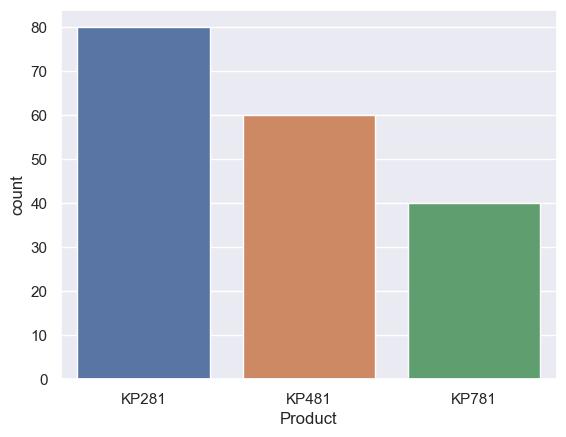

In [67]:
# Product Analysis - count plot
sns.countplot(data=df, x='Product')
plt.show

In [65]:
#KP281 is the most commonly purchase product type
#KP481 is the second most top product type purchased
#KP781 is the least purchased product type

<function matplotlib.pyplot.show(close=None, block=None)>

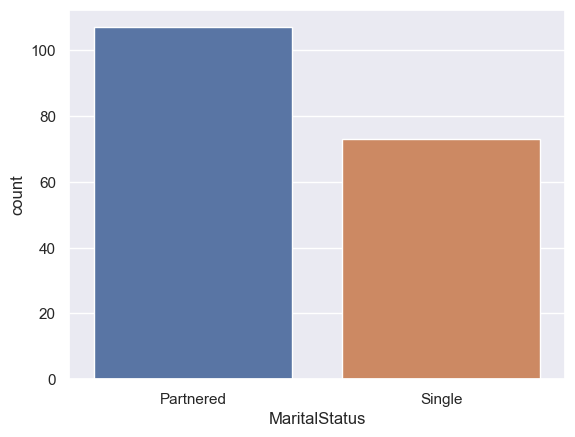

In [68]:
sns.countplot(data=df, x='MaritalStatus')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

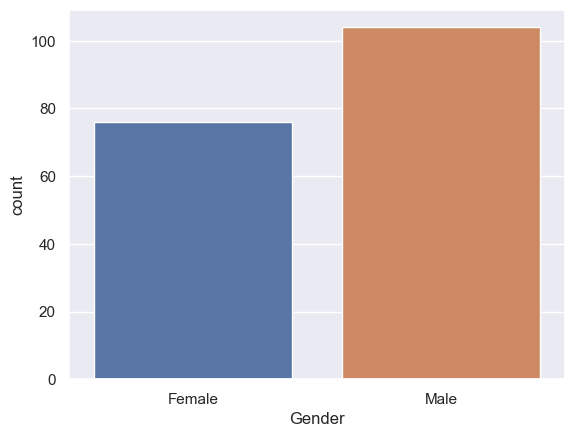

In [74]:
sns.countplot(data=df, x='Gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

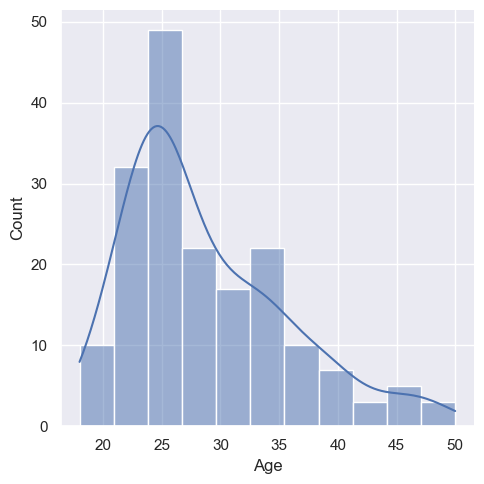

In [83]:
sns.displot(data=df, x='Age',kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

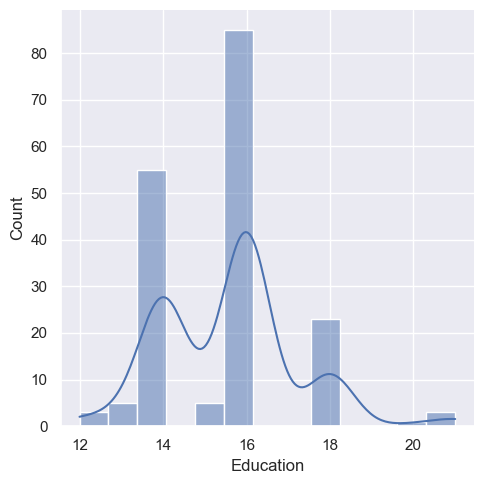

In [84]:
sns.displot(data=df, x='Education',kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

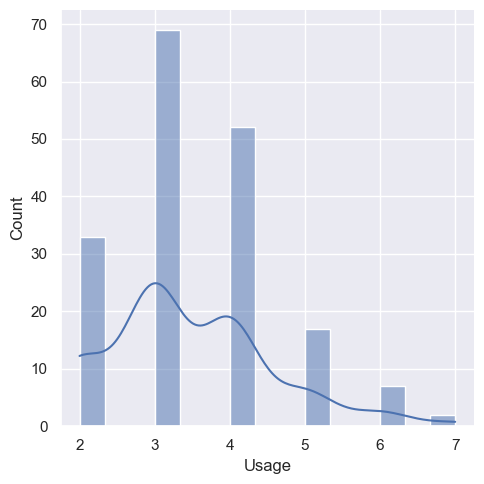

In [85]:
sns.displot(data=df, x='Usage',kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

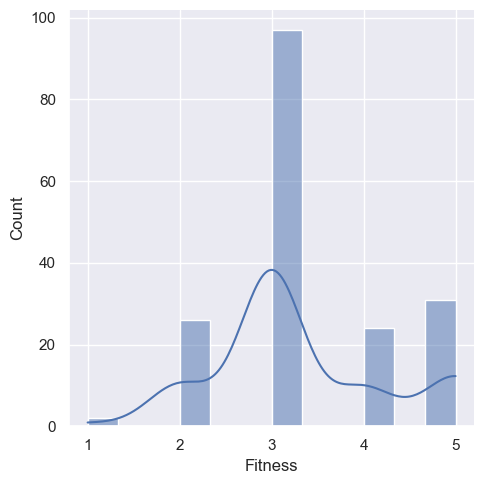

In [86]:
sns.displot(data=df, x='Fitness',kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

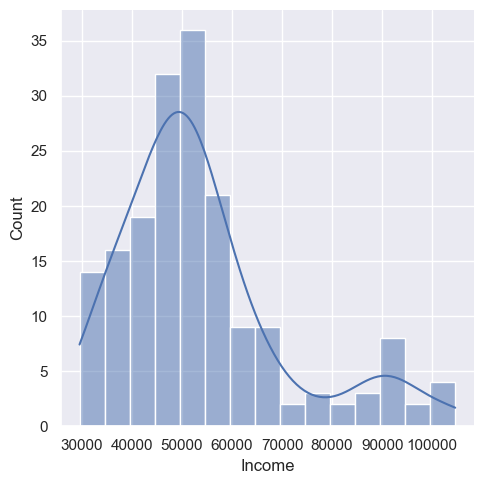

In [87]:
sns.displot(data=df, x='Income',kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

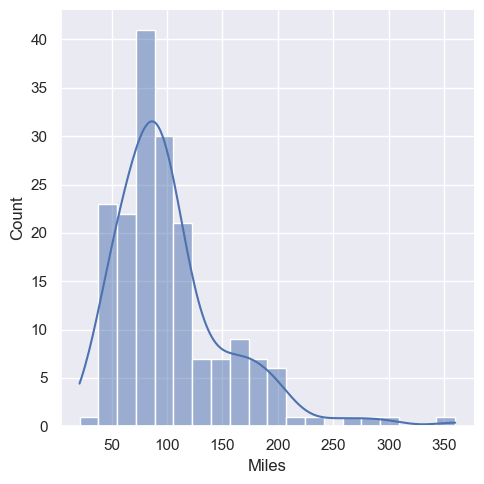

In [88]:
sns.displot(data=df, x='Miles',kde=True)
plt.show

In [ ]:
###

#what have we learned 

In [ ]:
###
#both incomes and miles have significant outliers 
#most cometomers make between 45 and 60 k 
#most customer have a fitness level of 3 

###

In [89]:
##box plots (outlier testes)

<function matplotlib.pyplot.show(close=None, block=None)>

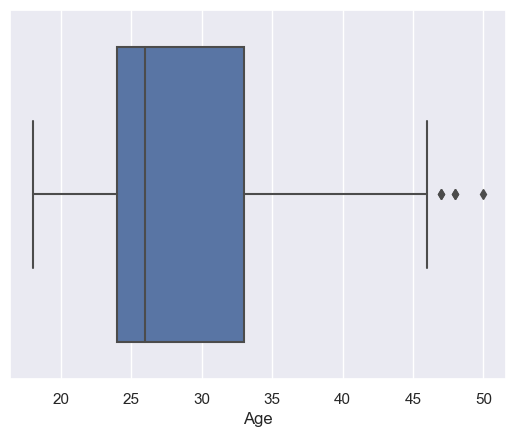

In [92]:
sns.boxplot(data=df, x='Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

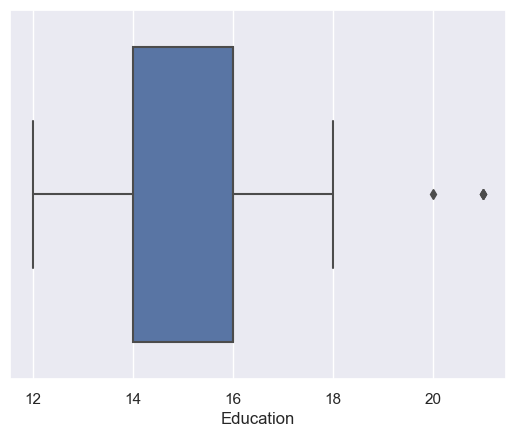

In [96]:
sns.boxplot(data=df, x='Education')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

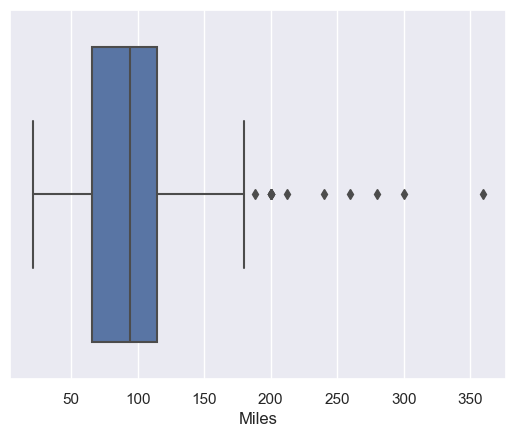

In [97]:
sns.boxplot(data=df, x='Miles')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

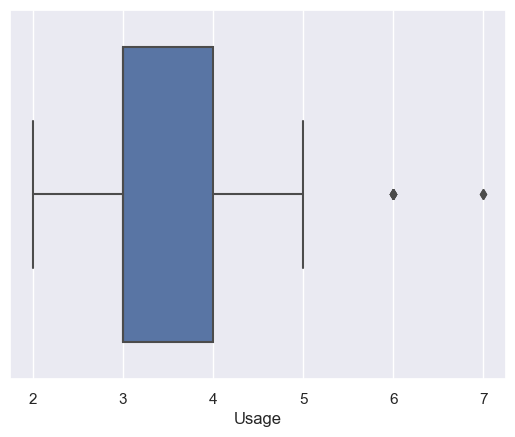

In [98]:
sns.boxplot(data=df, x='Usage')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

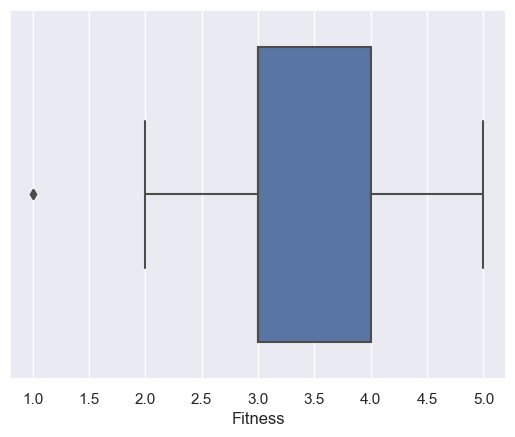

In [99]:
sns.boxplot(data=df, x='Fitness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

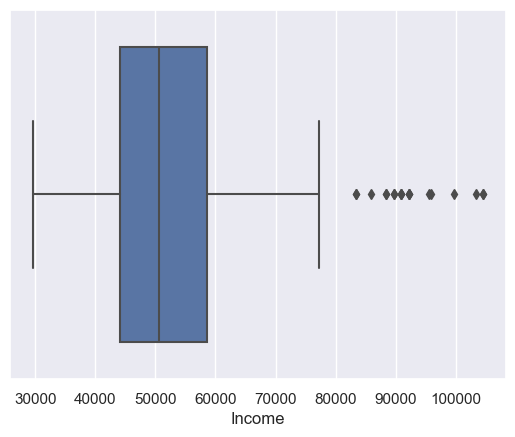

In [100]:
sns.boxplot(data=df, x='Income')
plt.show

In [101]:
# opservations 
#income and miles have more outliers than the rest 

In [102]:
#Bivariate Analysis

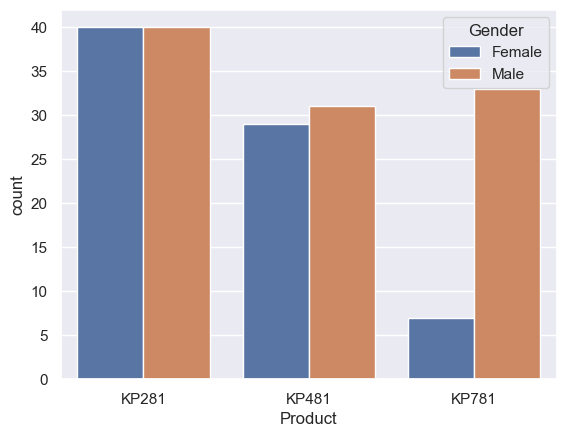

In [104]:
# Gender & Product
sns.countplot(data=df, x='Product', hue='Gender')
plt.show()


In [105]:
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

In [107]:
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

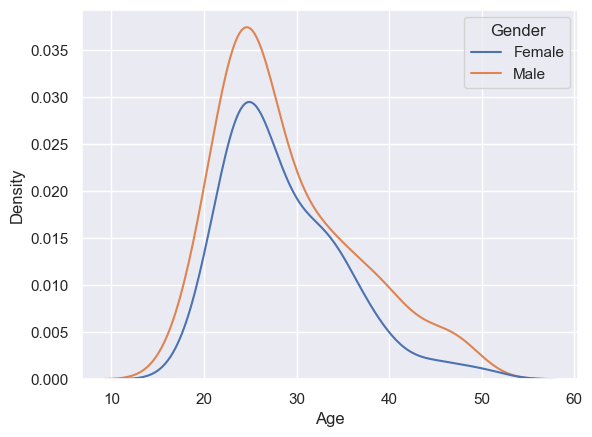

In [109]:
sns.kdeplot(data=df, x='Age', hue='Gender')
plt.show()

In [ ]:
#Most common preference for both gender is KP281.
#Ratio of Male/Female customers is huge in KP781.
#Distribution of Male & Female is roughly same for KP481.
#Males have bought more KP781 compare to KP481.
#Most of the customers are in the age range of 20-40.
#Most of the Men are treadmill buyers.

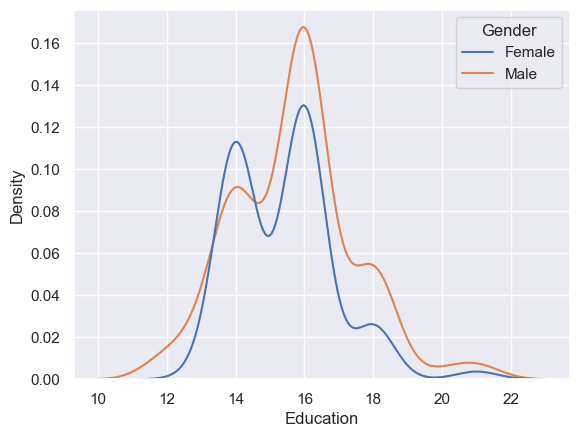

In [110]:
sns.kdeplot(data=df, x='Education', hue='Gender')
plt.show()


In [111]:
#Both genders have roughly same education years.
#As the dataset contains majority of Male customers, Education count of male are high.
# There are some female who has 13-15 years of education

In [112]:
#Model KP281 dominates the treadmill market, capturing 44% of all sales, making it the most preferred option among buyers.
#The primary customer base for treadmills falls within the annual income range of $45,000 to $80,000, with 83% of purchases made by individuals earning between $35,000 and $85,000.
#Only a small fraction (8%) of treadmill customers earn less than $35,000.
#The 20 to 40 age group is the most active in purchasing treadmills, representing 88% of the customer base.
#There's a strong correlation between a customer's fitness level and treadmill usage, indicating that individuals with higher fitness levels tend to use treadmills more frequently.
#The KP781 model is uniquely purchased by customers with more than 20 years of education and incomes exceeding $85,000.
#Customers with fitness levels 4 and 5 typically opt for high-end treadmills, averaging over 150 miles per week.
#Recommendations:

#Models KP281 and KP481 should be targeted at customers with incomes ranging from $45,000 to $60,000 as affordable options.
#The KP781, being a premium model, should be specifically marketed towards higher income groups and those with over 20 years of education, to boost sales.
#Given the KP781's high-end features, it's particularly suitable for fitness enthusiasts who log significant weekly mileage and have the financial means.
#Aerofit is advised to explore market research opportunities to potentially attract customers earning less than $35,000, aiming to broaden its market reach.